DS201 - Deep Learning trong Khoa học dữ liệu

Bài thực hành 5. MẠNG NEURAL HỒI QUY (RNN) 

Họ tên: Nguyễn Mạnh Đức

MSSV: 20521196 

# 1. Bộ dữ liệu 

In [1]:
from keras.datasets import imdb
(training_data, training_targets),(testing_data, testing_targets)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Cho biết số lượng phần tử của tập train và tập test

In [4]:
print("Tập train: " + str(len(training_targets)))
print("Tập test: " + str(len(testing_targets)))

Tập train: 25000
Tập test: 25000


Vẽ biểu đồ cột thể hiện số lượng nhãn của mỗi tập dữ liệu và biểu đồ tròn thể hiện tỉ lệ phân bố nhãn của mỗi tập dữ liệu

In [6]:
import matplotlib.pyplot as plt
labels = ['0', '1']
 
sl_1_train = sum(training_targets[training_targets == 1])
sl_0_train = len(training_targets) - sl_1_train 

sl_1_test = sum(testing_targets[testing_targets == 1])
sl_0_test = len(testing_targets) - sl_1_test

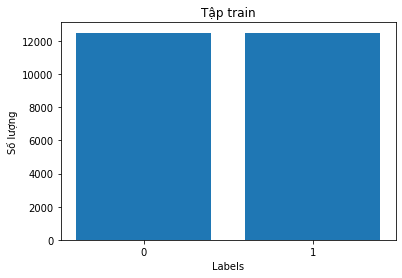

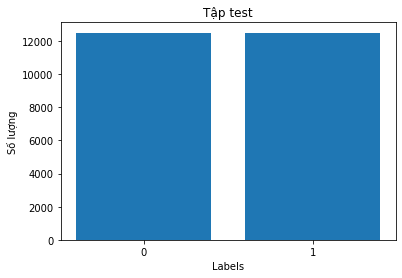

In [8]:
sl_train = [sl_0_train, sl_1_train] 

plt.bar(labels, sl_train)
plt.ylabel('Số lượng')
plt.xlabel('Labels')
plt.title("Tập train")
plt.show()

sl_test = [sl_0_test, sl_1_test] 

plt.bar(labels, sl_test)
plt.ylabel('Số lượng')
plt.xlabel('Labels')
plt.title("Tập test")
plt.show()

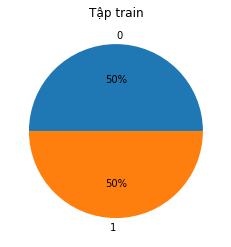

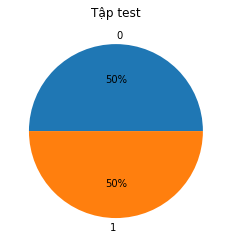

In [14]:
plt.pie(x=sl_train,labels=labels,autopct='%.0f%%')
plt.title("Tập train")
plt.show()

plt.pie(x=sl_test,labels=labels,autopct='%.0f%%')
plt.title("Tập test")
plt.show()

In ra 5 câuđầu tiên trong tập train và tập test kèm nhãn tương ứng

In [15]:
print("Tập train: -----------------------")
for i in range(5):
  print("train[" + str(i) + "] : " + str(training_data[i]))
  print("=> label: " + str(training_targets[i]))
  print("")
print("")
print("Tập test : -----------------------")
for i in range(5):
  print("test[" + str(i) + "] : " + str(testing_data[i]))
  print("=> label: " + str(testing_targets[i]))
  print("")

Tập train: -----------------------
train[0] : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
=> label: 1

t

In [16]:
index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


 Cho biết 5 từ đầu tiên của tập từ vựng

In [17]:
a = list(index.keys())
a[:5]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']

Cho biết tập từ vựng của bộ dữ liệu có bao nhiêu từ

In [18]:
print("Tập từ vựng có " + str(len(index)) + " từ")

Tập từ vựng có 88584 từ


In [19]:
reverse_index= dict([(value,key)for (key,value)in index.items()])
decoded= " ".join([reverse_index.get(i,"#")for i in training_data[0]])

In [20]:
print("Độ dài câu văn vừa được decode: " + str(len(training_data[0])))

Độ dài câu văn vừa được decode: 218


Decode 5 câu tiếp theo trong tập train

In [23]:
for i in range(1,6):
  reverse_index = dict([(value,key)for (key,value) in index.items()])
  decoded = ' '.join([reverse_index.get(i,"#") for i in training_data[i]])
  print(decoded)

the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them
the as there in at by br of sure many br of 

Padding chiều dài của sequence


In [24]:
from keras_preprocessing.sequence import pad_sequences
maxlen = 200
X_train = pad_sequences(training_data, maxlen=maxlen)
X_test = pad_sequences(testing_data, maxlen=maxlen)

In [25]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_targets,num_classes=2)
y_test = testing_targets

# 2. Xây dựng mô hình 

In [26]:
import numpy as np
X_train_new = np.expand_dims(X_train, axis=2)
X_test_new = np.expand_dims(X_test, axis=2)


In [27]:
from tensorflow.keras.layers import SimpleRNN,Input, Dense,LSTM, Embedding, Bidirectional
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(Input(shape=(None, 1), dtype="float64"))
model.add(SimpleRNN(200, return_sequences=True, return_state=False,
activation='relu'))
model.add(SimpleRNN(200, return_sequences=False, return_state=False,
activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Sử dụng hàm summary để xem cấu trúc mô hình đã xây dựng

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 200)         40400     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 200)               80200     
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 121,002
Trainable params: 121,002
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [38]:
history=model.fit(X_train_new, y_train, batch_size=128,epochs=5,validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 65s 343ms/step - loss: 16323006.0000 - accuracy: 0.5042 - val_loss: 2.3757 - val_accuracy: 0.4980
Epoch 2/5
176/176 [==============================] - 57s 324ms/step - loss: 3.1939 - accuracy: 0.5008 - val_loss: 2.7960 - val_accuracy: 0.4868
Epoch 3/5
176/176 [==============================] - 58s 331ms/step - loss: 2.8933 - accuracy: 0.4986 - val_loss: 3.0907 - val_accuracy: 0.4908
Epoch 4/5
176/176 [==============================] - 59s 332ms/step - loss: 2.4128 - accuracy: 0.4967 - val_loss: 3.2767 - val_accuracy: 0.4864
Epoch 5/5
176/176 [==============================] - 59s 336ms/step - loss: 2.3176 - accuracy: 0.4968 - val_loss: 1.2037 - val_accuracy: 0.5176


 Vẽ đồ thị học với Accuracy và Loss

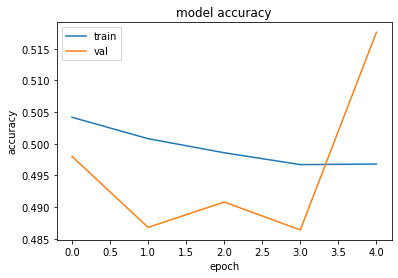

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

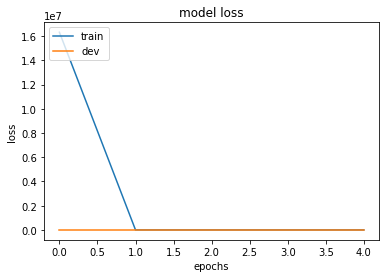

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','dev'],loc='upper left')
plt.show

In [41]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_new)
y_pred_label = np.argmax(y_pred,axis=-1)

782/782 [==============================] - 24s 30ms/step


Tính độ chính xác đánh giá của mô hình bằng độ đo Accuracy

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)*100

50.036

# 3. LSTM BILSTM EMBEDDING

LSTM

In [43]:
from tensorflow.keras.layers import  Embedding, Bidirectional, LSTM

In [44]:
from tensorflow.keras.losses import BinaryCrossentropy
loss = BinaryCrossentropy()

In [45]:
model1 = Sequential()
model1.add(Input(shape=(None, ), dtype="float64"))
model1.add(Embedding(len(index), 128))
model1.add(LSTM(200, return_sequences=False))
model1.add(Dense(2, activation='sigmoid'))

Sử dụng hàm summary để xem cấu trúc mô hình đã xây dựng

In [46]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         11338752  
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 11,602,354
Trainable params: 11,602,354
Non-trainable params: 0
_________________________________________________________________


In [47]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [48]:
history1=model1.fit(X_train_new, y_train, batch_size=128,epochs=5,validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 10s 32ms/step - loss: 0.5197 - accuracy: 0.7373 - val_loss: 0.3377 - val_accuracy: 0.8564
Epoch 2/5
176/176 [==============================] - 5s 29ms/step - loss: 0.2371 - accuracy: 0.9052 - val_loss: 0.2998 - val_accuracy: 0.8724
Epoch 3/5
176/176 [==============================] - 5s 29ms/step - loss: 0.1529 - accuracy: 0.9446 - val_loss: 0.3505 - val_accuracy: 0.8720
Epoch 4/5
176/176 [==============================] - 5s 29ms/step - loss: 0.0910 - accuracy: 0.9679 - val_loss: 0.3827 - val_accuracy: 0.8732
Epoch 5/5
176/176 [==============================] - 5s 30ms/step - loss: 0.0596 - accuracy: 0.9792 - val_loss: 0.4657 - val_accuracy: 0.8752


Vẽ đồ thị học với Accuracy và Loss

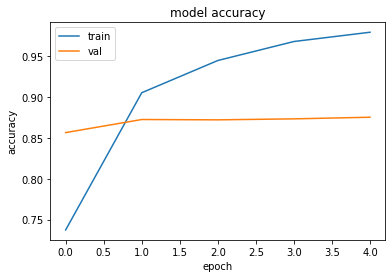

In [49]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

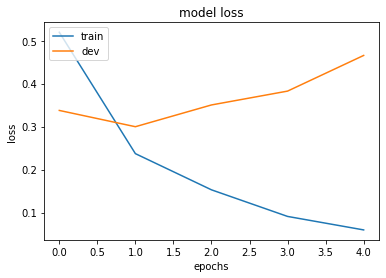

In [50]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','dev'],loc='upper left')
plt.show

Đánh giá độ chính xác mô hình bằng độ đo Accuracy

In [51]:
y_pred = model1.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 4s 5ms/step


86.084

BiLSTM

In [52]:
model2 = Sequential()
model2.add(Input(shape=(None, ), dtype="float64"))
model2.add(Embedding(len(index), 128))
model2.add(Bidirectional(LSTM(200, return_sequences=False)))
model2.add(Dense(2, activation='sigmoid'))

In [53]:
optimizer = Adam(learning_rate = 0.01)
loss = BinaryCrossentropy()
model2.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [54]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         11338752  
                                                                 
 bidirectional (Bidirectiona  (None, 400)              526400    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 2)                 802       
                                                                 
Total params: 11,865,954
Trainable params: 11,865,954
Non-trainable params: 0
_________________________________________________________________


In [55]:
history2 = model2.fit(X_train_new, y_train, batch_size = 128,epochs =5, validation_split = 0.1)

Epoch 1/5
176/176 [==============================] - 12s 56ms/step - loss: 0.5187 - accuracy: 0.7387 - val_loss: 0.3558 - val_accuracy: 0.8560
Epoch 2/5
176/176 [==============================] - 9s 51ms/step - loss: 0.2827 - accuracy: 0.8837 - val_loss: 0.3045 - val_accuracy: 0.8776
Epoch 3/5
176/176 [==============================] - 9s 51ms/step - loss: 0.1714 - accuracy: 0.9346 - val_loss: 0.3418 - val_accuracy: 0.8600
Epoch 4/5
176/176 [==============================] - 9s 51ms/step - loss: 0.1189 - accuracy: 0.9565 - val_loss: 0.4248 - val_accuracy: 0.8616
Epoch 5/5
176/176 [==============================] - 9s 51ms/step - loss: 0.0834 - accuracy: 0.9701 - val_loss: 0.4691 - val_accuracy: 0.8648


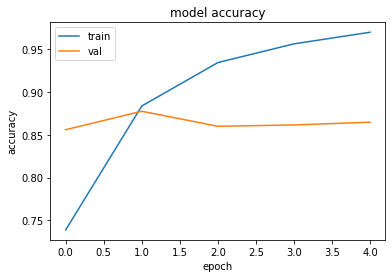

In [56]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

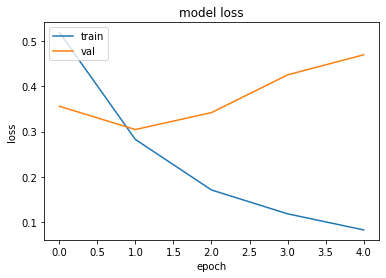

In [57]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [58]:
y_pred = model2.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 8s 9ms/step


86.188

# 4. BÀI TẬP 

## Bài tập 1

In [59]:
history3 = model.fit(X_train_new, y_train, batch_size = 128,epochs = 20, validation_split = 0.1)

Epoch 1/20
176/176 [==============================] - 59s 338ms/step - loss: 1.4402 - accuracy: 0.5080 - val_loss: 1.3170 - val_accuracy: 0.4880
Epoch 2/20
176/176 [==============================] - 60s 344ms/step - loss: 1.6598 - accuracy: 0.5017 - val_loss: 1.6842 - val_accuracy: 0.5012
Epoch 3/20
176/176 [==============================] - 58s 331ms/step - loss: 1.3930 - accuracy: 0.5031 - val_loss: 1.4049 - val_accuracy: 0.5072
Epoch 4/20
176/176 [==============================] - 59s 338ms/step - loss: 1.4461 - accuracy: 0.4976 - val_loss: 0.8766 - val_accuracy: 0.4844
Epoch 5/20
176/176 [==============================] - 59s 333ms/step - loss: 1.3325 - accuracy: 0.5020 - val_loss: 1.0330 - val_accuracy: 0.4924
Epoch 6/20
176/176 [==============================] - 60s 340ms/step - loss: 1.2599 - accuracy: 0.4956 - val_loss: 1.0704 - val_accuracy: 0.4904
Epoch 7/20
176/176 [==============================] - 57s 324ms/step - loss: 1.1814 - accuracy: 0.5025 - val_loss: 0.9927 - val_ac

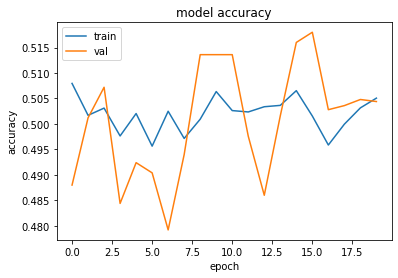

In [60]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

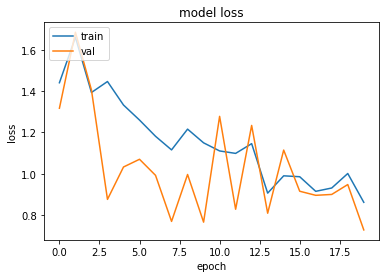

In [61]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [62]:
y_pred = model.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)

accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 23s 29ms/step


49.756

In [63]:
history4 = model1.fit(X_train_new, y_train, batch_size = 128,epochs =20, validation_split = 0.1)

Epoch 1/20
176/176 [==============================] - 5s 30ms/step - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.5282 - val_accuracy: 0.8700
Epoch 2/20
176/176 [==============================] - 5s 30ms/step - loss: 0.0415 - accuracy: 0.9857 - val_loss: 0.5531 - val_accuracy: 0.8604
Epoch 3/20
176/176 [==============================] - 5s 30ms/step - loss: 0.0342 - accuracy: 0.9881 - val_loss: 0.5860 - val_accuracy: 0.8728
Epoch 4/20
176/176 [==============================] - 5s 30ms/step - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.6457 - val_accuracy: 0.8656
Epoch 5/20
176/176 [==============================] - 5s 30ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.7292 - val_accuracy: 0.8592
Epoch 6/20
176/176 [==============================] - 5s 29ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.9090 - val_accuracy: 0.8460
Epoch 7/20
176/176 [==============================] - 5s 29ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.6350 - val_accuracy: 0.8524

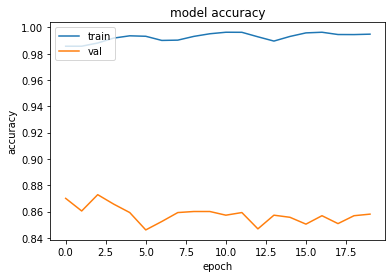

In [64]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

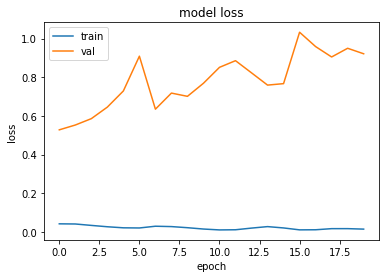

In [65]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [66]:
y_pred = model1.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)

accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 4s 5ms/step


84.636

In [67]:
history5 = model2.fit(X_train_new, y_train, batch_size = 128,epochs =20, validation_split = 0.1)

Epoch 1/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0556 - accuracy: 0.9812 - val_loss: 0.5146 - val_accuracy: 0.8652
Epoch 2/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0553 - accuracy: 0.9808 - val_loss: 0.5101 - val_accuracy: 0.8568
Epoch 3/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.6510 - val_accuracy: 0.8516
Epoch 4/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0416 - accuracy: 0.9844 - val_loss: 0.6527 - val_accuracy: 0.8492
Epoch 5/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0352 - accuracy: 0.9876 - val_loss: 0.6438 - val_accuracy: 0.8600
Epoch 6/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0267 - accuracy: 0.9907 - val_loss: 0.7045 - val_accuracy: 0.8500
Epoch 7/20
176/176 [==============================] - 9s 51ms/step - loss: 0.0222 - accuracy: 0.9917 - val_loss: 0.8022 - val_accuracy: 0.8564

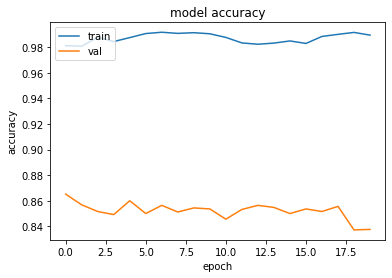

In [68]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

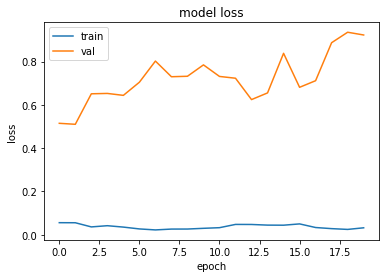

In [69]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [70]:
y_pred = model2.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 7s 9ms/step


83.14399999999999

## Bài tập 2

In [71]:
modelb2 = Sequential()
modelb2.add(Input(shape=(None, 1), dtype="float64"))
modelb2.add(SimpleRNN(200, return_sequences=True,activation='relu'))
modelb2.add(SimpleRNN(200, return_sequences=True, return_state=False,activation='relu'))
modelb2.add(SimpleRNN(200, return_sequences=False, return_state=False,activation='relu'))
modelb2.add(Dense(2, activation='sigmoid'))

In [73]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
optimizer = Adam(learning_rate=0.01)
loss = BinaryCrossentropy()

In [74]:
modelb2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [75]:
historyb2 = modelb2.fit(X_train_new, y_train, batch_size = 128,epochs =5, validation_split = 0.1)

Epoch 1/5
176/176 [==============================] - 99s 553ms/step - loss: 13780.5166 - accuracy: 0.4975 - val_loss: 0.8396 - val_accuracy: 0.4892
Epoch 2/5
176/176 [==============================] - 98s 556ms/step - loss: 0.7213 - accuracy: 0.5037 - val_loss: 0.6934 - val_accuracy: 0.4876
Epoch 3/5
176/176 [==============================] - 98s 556ms/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6933 - val_accuracy: 0.4876
Epoch 4/5
176/176 [==============================] - 97s 549ms/step - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5132
Epoch 5/5
176/176 [==============================] - 96s 544ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6936 - val_accuracy: 0.4876


In [78]:
y_pred = modelb2.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 33s 42ms/step


49.996

## Bài tập 3

In [79]:
modelb3 = Sequential()
modelb3.add(Input(shape=(None, ), dtype="float64"))
modelb3.add(Embedding(len(index), 128))
modelb3.add(LSTM(200, return_sequences=False))
modelb3.add(Dense(2, activation='softmax'))

In [81]:
optimizer = Adam(learning_rate = 0.01)
loss = BinaryCrossentropy()
modelb3.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [82]:
historyb3 = modelb3.fit(X_train_new, y_train, batch_size = 128,epochs =5, validation_split = 0.1)

Epoch 1/5
176/176 [==============================] - 7s 32ms/step - loss: 0.5286 - accuracy: 0.7224 - val_loss: 0.3448 - val_accuracy: 0.8664
Epoch 2/5
176/176 [==============================] - 5s 29ms/step - loss: 0.2397 - accuracy: 0.9030 - val_loss: 0.3137 - val_accuracy: 0.8732
Epoch 3/5
176/176 [==============================] - 5s 30ms/step - loss: 0.1449 - accuracy: 0.9462 - val_loss: 0.3401 - val_accuracy: 0.8776
Epoch 4/5
176/176 [==============================] - 5s 30ms/step - loss: 0.0959 - accuracy: 0.9660 - val_loss: 0.3971 - val_accuracy: 0.8636
Epoch 5/5
176/176 [==============================] - 5s 30ms/step - loss: 0.0644 - accuracy: 0.9780 - val_loss: 0.4446 - val_accuracy: 0.8672


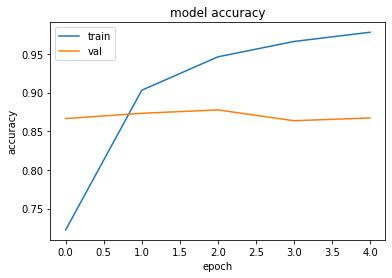

In [83]:
plt.plot(historyb3.history['accuracy'])
plt.plot(historyb3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

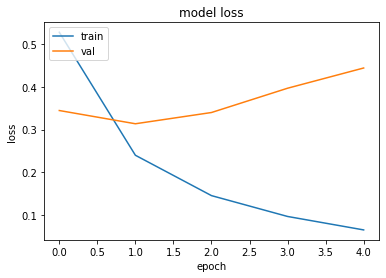

In [84]:
plt.plot(historyb3.history['loss'])
plt.plot(historyb3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [85]:
y_pred=modelb3.predict(X_test_new)
y_pred=np.argmax(y_pred,axis=-1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 4s 5ms/step


86.288

## Bài tập 4

In [86]:
modelb4 = Sequential()
modelb4.add(Input(shape=(None, ), dtype="float64"))
modelb4.add(Embedding(len(index), 128))
modelb4.add(LSTM(200, return_sequences=True))
modelb4.add(LSTM(200, return_sequences=False))
modelb4.add(Dense(2, activation='softmax'))

In [88]:
optimizer = Adam(learning_rate = 0.01)
loss = BinaryCrossentropy()
modelb4.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [89]:
historyb4 = modelb4.fit(X_train_new, y_train, batch_size = 128,epochs =5, validation_split = 0.1)

Epoch 1/5
176/176 [==============================] - 13s 60ms/step - loss: 0.5751 - accuracy: 0.7006 - val_loss: 0.5534 - val_accuracy: 0.7156
Epoch 2/5
176/176 [==============================] - 10s 55ms/step - loss: 0.3279 - accuracy: 0.8623 - val_loss: 0.3303 - val_accuracy: 0.8620
Epoch 3/5
176/176 [==============================] - 10s 55ms/step - loss: 0.2271 - accuracy: 0.9089 - val_loss: 0.3118 - val_accuracy: 0.8660
Epoch 4/5
176/176 [==============================] - 10s 56ms/step - loss: 0.1583 - accuracy: 0.9426 - val_loss: 0.3373 - val_accuracy: 0.8664
Epoch 5/5
176/176 [==============================] - 10s 56ms/step - loss: 0.1134 - accuracy: 0.9597 - val_loss: 0.3689 - val_accuracy: 0.8708


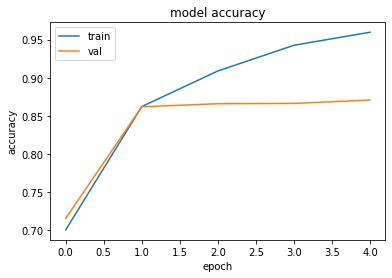

In [90]:
plt.plot(historyb4.history['accuracy'])
plt.plot(historyb4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

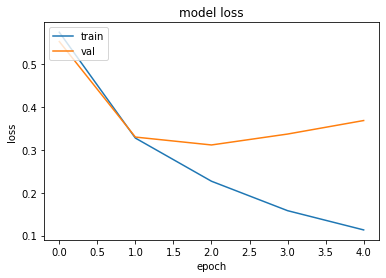

In [91]:
plt.plot(historyb4.history['loss'])
plt.plot(historyb4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [92]:
y_pred = modelb4.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 8s 9ms/step


86.60799999999999

## Bài tập 5

In [93]:
from tensorflow.keras.layers import GRU

In [94]:
modelb5 = Sequential()
modelb5.add(Input(shape=(None, ), dtype="float64"))
modelb5.add(Embedding(len(index), 128))
modelb5.add(GRU(200,return_sequences=False))
modelb5.add(Dense(2, activation='softmax'))

In [95]:
modelb5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         11338752  
                                                                 
 gru (GRU)                   (None, 200)               198000    
                                                                 
 dense_6 (Dense)             (None, 2)                 402       
                                                                 
Total params: 11,537,154
Trainable params: 11,537,154
Non-trainable params: 0
_________________________________________________________________


In [96]:
optimizer = Adam(learning_rate = 0.01)
loss = BinaryCrossentropy()
modelb5.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [97]:
historyb5 = modelb5.fit(X_train_new, y_train, batch_size = 128,epochs =5, validation_split = 0.1)

Epoch 1/5
176/176 [==============================] - 7s 30ms/step - loss: 0.4208 - accuracy: 0.7900 - val_loss: 0.2708 - val_accuracy: 0.8888
Epoch 2/5
176/176 [==============================] - 5s 27ms/step - loss: 0.1827 - accuracy: 0.9305 - val_loss: 0.2803 - val_accuracy: 0.8876
Epoch 3/5
176/176 [==============================] - 5s 27ms/step - loss: 0.1048 - accuracy: 0.9611 - val_loss: 0.3683 - val_accuracy: 0.8720
Epoch 4/5
176/176 [==============================] - 5s 27ms/step - loss: 0.0770 - accuracy: 0.9726 - val_loss: 0.4550 - val_accuracy: 0.8584
Epoch 5/5
176/176 [==============================] - 5s 27ms/step - loss: 0.0969 - accuracy: 0.9632 - val_loss: 0.5266 - val_accuracy: 0.8380


In [100]:
y_pred = modelb5.predict(X_test_new)
y_pred = np.argmax(y_pred,axis = -1)
accuracy_score(y_test,y_pred)*100

782/782 [==============================] - 4s 5ms/step


83.43199999999999